# ML Assignment 1

Data set 1 - Bank Account Fraud Dataset \
https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 \
Data set 2 - Customer Segmentation \
https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv


In [1]:
# Load function and data

In [2]:
%run ./ML_assignment1_Functions.ipynb

In [3]:
# Data set 1
# Neural Network

In [39]:
from sklearn.neural_network import MLPClassifier
# load data
df = load_data('Base.csv')

In [5]:
## model1.1 - Neural network with Feature engineering

In [6]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'hidden_layer_sizes': (100,), # (1,1,1) 3 hidden layers with 1 hidden unit each
          'activation': 'relu',
#           'max_iter':20,
          'solver':'adam' # default
         }
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=(100,), activation='relu')
mlp.fit(X_train, y_train)
nn_fe = model(mlp, X_train, y_train, X_valid, y_valid)


nn_fe['name'] = 'nn_Feature_engineering'
nn_fe

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name
0,0.806,0.753,0.727,0.709,0.806,0.792,0.23438,nn_Feature_engineering


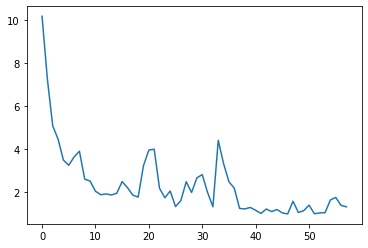

In [7]:
plt.plot(mlp.loss_curve_)

In [8]:
## model1.2 - Neural network with tuning layers and activation

In [9]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
params = {'hidden_layer_sizes': [(1,),(3,),(1,1,1),(3,3,3),(5,5,5), (100,)],
          'activation': ['relu','identity', 'tanh']}
nn_tune_perf = pd.DataFrame()
for x in params['hidden_layer_sizes']:
#     print(x)
    for y in params['activation']:
#         print(y)
        mlp = MLPClassifier(random_state=0, hidden_layer_sizes=x, 
                            activation=y)
        nn_tune = model(mlp, X_train, y_train, X_valid, y_valid)
        nn_tune['layer'] =  str(x)
        nn_tune['activation'] = y
        nn_tune_perf = nn_tune_perf.append(nn_tune)

nn_tune_perf['name'] = 'nn_tune'
nn_tune_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,layer,activation,name
0,0.715,0.501,0.501,0.501,0.715,0.598,0.03125,"(1,)",relu,nn_tune
0,0.621,0.715,0.679,0.678,0.621,0.638,0.18750,"(1,)",identity,nn_tune
0,0.612,0.658,0.758,0.729,0.612,0.619,0.15625,"(1,)",tanh,nn_tune
0,0.612,0.758,0.758,0.729,0.612,0.619,0.21875,"(3,)",relu,nn_tune
0,0.635,0.673,0.694,0.708,0.635,0.650,0.04688,"(3,)",identity,nn_tune
0,0.611,0.755,0.757,0.727,0.611,0.618,0.26562,"(3,)",tanh,nn_tune
0,0.715,0.500,0.500,0.500,0.715,0.596,0.00000,"(1, 1, 1)",relu,nn_tune
0,0.630,0.688,0.716,0.699,0.630,0.645,0.20312,"(1, 1, 1)",identity,nn_tune
0,0.285,0.483,0.500,0.500,0.285,0.126,0.00000,"(1, 1, 1)",tanh,nn_tune
0,0.611,0.748,0.758,0.727,0.611,0.618,0.67188,"(3, 3, 3)",relu,nn_tune


In [10]:
## model1.3 - Neural network with Grid Search

In [41]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model

t_start = process_time()
h1=[x for x in itertools.product((3,5,10),repeat=1)]
h2=[x for x in itertools.product((3,5,10),repeat=2)]
h3=[x for x in itertools.product((3,5,10),repeat=3)]
params = {'hidden_layer_sizes': h1+h2+h3+[(100,), (100,100), (100,100,100)],
          'activation': ['relu','identity', 'tanh']}
mlp = GridSearchCV(MLPClassifier(), params, scoring='roc_auc', n_jobs=-1, cv=3)
mlp.fit(X=X_train, y=y_train)
t_stop = process_time()
print (mlp.best_score_, mlp.best_params_, 'time spend: ', round(t_stop - t_start, 3)) 
hls = mlp.best_params_['hidden_layer_sizes']
act = mlp.best_params_['activation']

0.817689182664261 {'activation': 'identity', 'hidden_layer_sizes': (3,)} time spend:  4.234


In [42]:
mlp = MLPClassifier(random_state=0, hidden_layer_sizes = hls, activation = act)
nn_gs_perf = model(mlp, X_train, y_train, X_valid, y_valid)
nn_gs_perf['layer'] =  str(hls)
nn_gs_perf['activation'] = act
nn_gs_perf['name'] = 'nn_grid_search'
nn_gs_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,layer,activation,name
0,0.635,0.673,0.694,0.708,0.635,0.65,0.01562,"(3,)",identity,nn_grid_search


In [13]:
# model4 - Neural network with learning curve

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,train_ratio,layer,activation,name
0,0.782,0.743,0.755,0.750,0.782,0.786,0.03125,0.1,"(3,)",identity,nn_train_size
0,0.830,0.795,0.805,0.810,0.830,0.833,0.04688,0.2,"(3,)",identity,nn_train_size
0,0.889,0.892,0.896,0.865,0.889,0.889,0.07812,0.3,"(3,)",identity,nn_train_size
0,0.972,0.951,0.951,0.952,0.972,0.972,0.09375,0.4,"(3,)",identity,nn_train_size
0,0.956,0.966,0.969,0.965,0.956,0.957,0.06250,0.5,"(3,)",identity,nn_train_size
0,0.874,0.882,0.824,0.830,0.874,0.872,0.23438,0.6,"(3,)",identity,nn_train_size
0,0.716,0.881,0.507,0.502,0.716,0.599,0.18750,0.7,"(3,)",identity,nn_train_size
0,0.730,0.774,0.776,0.772,0.730,0.743,0.03125,0.8,"(3,)",identity,nn_train_size
0,0.676,0.723,0.719,0.723,0.676,0.692,0.00000,0.9,"(3,)",identity,nn_train_size
0,0.628,0.677,0.683,0.680,0.628,0.644,0.03125,1.0,"(3,)",identity,nn_train_size


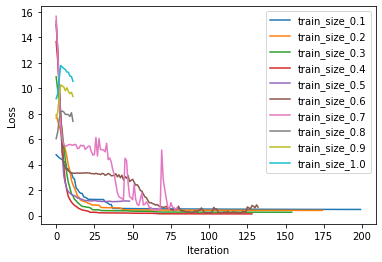

In [14]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# create an empty df for output
nn_lc_perf_out = pd.DataFrame()
for r in [0.1, 0.2,0.3, 0.4, 0.5,0.6, 0.7,0.8,0.9,1.0]:
    # frac train set to build model
#     print(len(X_train))
    X_trainf = X_train.sample(frac = r, random_state=0)
    y_trainf = y_train.loc[X_trainf.index]
    
#     print(len(X_trainf), len(y_trainf))
    # feature engineering
    X_trainf, X_valid, X_test = ohe(X_trainf, X_valid, X_test)
    # oversampling
    X_trainf, y_trainf = oversampling(X_trainf, y_trainf)
    # model
    params = {'hidden_layer_sizes': hls,
          'activation': act}
    mlp =  MLPClassifier(random_state = 0, hidden_layer_sizes=hls, activation=act)
    mlp.fit(X_trainf, y_trainf)
    # plot loss curve
    plt.plot(mlp.loss_curve_, label = "train_size_"+str(r))
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    
    lc_perf = model(mlp, X_trainf, y_trainf, X_valid, y_valid)
    # add columns
    lc_perf['train_ratio'] = str(r)
    lc_perf['layer'] = str(hls)
    lc_perf['activation'] = act
    lc_perf['name'] = 'nn_train_size'
    nn_lc_perf_out = nn_lc_perf_out.append(lc_perf)
    
nn_lc_perf_out

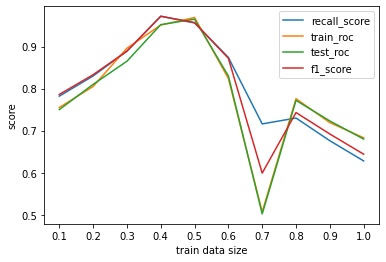

In [15]:
learning_curve_graph(nn_lc_perf_out)

In [16]:
# Neural network test set output

In [17]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
mlp =  MLPClassifier(random_state = 0, hidden_layer_sizes=hls, activation=act)
mlp.fit(X_train, y_train)
nn_test_perf = model(mlp, X_train, y_train, X_test, y_test)
nn_test_perf['layer'] = str(hls)
nn_test_perf['activation'] = act
nn_test_perf['name'] = 'nn_test'
nn_test_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,layer,activation,name
0,0.647,0.673,0.694,0.695,0.647,0.663,0.01562,"(3,)",identity,nn_test


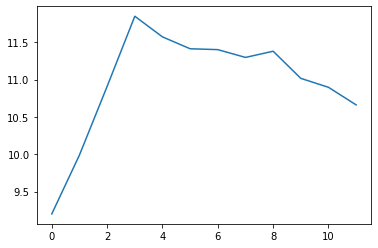

In [18]:
plt.plot(mlp.loss_curve_)
# max iteration default 200, the graph shows the model reach the best result at around 25th iteration 

In [20]:
nn_performance = pd.DataFrame()
nn_performance=nn_performance.append([nn_fe,nn_tune_perf,nn_gs_perf,nn_lc_perf_out,nn_test_perf]).reset_index()
nn_performance

,index,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name,layer,activation,train_ratio
0,0,0.806,0.753,0.727,0.709,0.806,0.792,0.23438,nn_Feature_engineering,NaN,NaN,NaN
1,0,0.715,0.501,0.501,0.501,0.715,0.598,0.03125,nn_tune,"(1,)",relu,NaN
2,0,0.621,0.715,0.679,0.678,0.621,0.638,0.18750,nn_tune,"(1,)",identity,NaN
3,0,0.612,0.658,0.758,0.729,0.612,0.619,0.15625,nn_tune,"(1,)",tanh,NaN
4,0,0.612,0.758,0.758,0.729,0.612,0.619,0.21875,nn_tune,"(3,)",relu,NaN
5,0,0.635,0.673,0.694,0.708,0.635,0.650,0.04688,nn_tune,"(3,)",identity,NaN
6,0,0.611,0.755,0.757,0.727,0.611,0.618,0.26562,nn_tune,"(3,)",tanh,NaN
7,0,0.715,0.500,0.500,0.500,0.715,0.596,0.00000,nn_tune,"(1, 1, 1)",relu,NaN
8,0,0.630,0.688,0.716,0.699,0.630,0.645,0.20312,nn_tune,"(1, 1, 1)",identity,NaN
9,0,0.285,0.483,0.500,0.500,0.285,0.126,0.00000,nn_tune,"(1, 1, 1)",tanh,NaN


In [21]:
nn_performance.to_excel('./performance/nn_perf_data1.xlsx',index=False)

# Data 2

In [43]:
from sklearn.neural_network import MLPClassifier
# load data
df = load_data('customer_segment.csv')
df.drop(columns= ['ID'],inplace=True)
# transform target variable
from sklearn.preprocessing import LabelEncoder
df.Segmentation=LabelEncoder().fit_transform(df.Segmentation)

In [23]:
## model2.1 - Neural network with Feature engineering

In [24]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model
params = {'hidden_layer_sizes': (100,), # 3 layers with 1 hidden unit each
          'activation': 'relu',
          'max_iter':20,
          'solver':'adam' # default
         }
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=(100,), activation='relu')
mlp.fit(X_train, y_train)
nn_fe = model2(mlp, X_train, y_train, X_valid, y_valid)


nn_fe['name'] = 'nn_Feature_engineering'
nn_fe

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name
0,0.474,0.482,0.832,0.739,0.474,0.459,0.828,nn_Feature_engineering


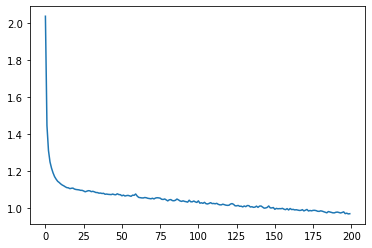

In [25]:
plt.plot(mlp.loss_curve_)

In [26]:
## model2.2 - Neural network with tuning layers and activation

In [27]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model
params = {'hidden_layer_sizes': [(1,),(3,),(1,1,1),(3,3,3),(5,5,5), 
                                 (100,), (100,100)],
          'activation': ['relu','identity', 'tanh']}
nn_tune_perf = pd.DataFrame()
for x in params['hidden_layer_sizes']:
    for y in params['activation']:
        mlp = MLPClassifier(random_state=0, hidden_layer_sizes=x, 
                            activation=y)
        nn_tune = model2(mlp, X_train, y_train, X_valid, y_valid)
        nn_tune['layer'] =  str(x)
        nn_tune['activation'] = y
        nn_tune_perf = nn_tune_perf.append(nn_tune)

nn_tune_perf['name'] = 'nn_tune'
nn_tune_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,layer,activation,name
0,0.284,0.284,0.499,0.492,0.284,0.127,0.156,"(1,)",relu,nn_tune
0,0.472,0.481,0.751,0.744,0.472,0.427,0.234,"(1,)",identity,nn_tune
0,0.284,0.286,0.500,0.479,0.284,0.133,0.078,"(1,)",tanh,nn_tune
0,0.491,0.490,0.758,0.736,0.491,0.461,0.469,"(3,)",relu,nn_tune
0,0.471,0.481,0.756,0.736,0.471,0.447,0.250,"(3,)",identity,nn_tune
0,0.492,0.501,0.768,0.749,0.492,0.464,0.344,"(3,)",tanh,nn_tune
0,0.286,0.286,0.500,0.500,0.286,0.127,0.234,"(1, 1, 1)",relu,nn_tune
0,0.474,0.479,0.751,0.744,0.474,0.425,0.359,"(1, 1, 1)",identity,nn_tune
0,0.470,0.453,0.745,0.736,0.470,0.389,0.641,"(1, 1, 1)",tanh,nn_tune
0,0.470,0.477,0.753,0.743,0.470,0.402,0.578,"(3, 3, 3)",relu,nn_tune


In [28]:
## model2.3 - Neural network with Grid Search

In [44]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)

# model
t_start = process_time()
h1=[x for x in itertools.product((3,5,10),repeat=1)]
h2=[x for x in itertools.product((3,5,10),repeat=2)]
h3=[x for x in itertools.product((3,5,10),repeat=3)]
params = {'hidden_layer_sizes': h1+h2+h3+[(100,), (100,100)],
          'activation': ['relu','identity', 'tanh']}
from sklearn.metrics import make_scorer,roc_auc_score
score = {'auc': make_scorer(roc_auc_score, needs_proba=True, multi_class="ovr")}
mlp = GridSearchCV(MLPClassifier(), params, scoring=score['auc'], n_jobs=-1, cv=3)
mlp.fit(X=X_train, y=y_train)
t_stop = process_time()
print (mlp.best_score_, mlp.best_params_, 'time spend: ', round(t_stop - t_start, 3)) 
hls = mlp.best_params_['hidden_layer_sizes']
act = mlp.best_params_['activation']

0.7514529776828122 {'activation': 'tanh', 'hidden_layer_sizes': (3,)} time spend:  1.703


In [45]:
mlp = MLPClassifier(random_state=0, hidden_layer_sizes = hls, activation = act)
nn_gs_perf = model2(mlp, X_train, y_train, X_valid, y_valid)
nn_gs_perf['layer'] =  str(hls)
nn_gs_perf['activation'] = act
nn_gs_perf['name'] = 'nn_grid_search'
nn_gs_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,layer,activation,name
0,0.492,0.501,0.768,0.749,0.492,0.464,0.516,"(3,)",tanh,nn_grid_search


In [31]:
# model2.4 - Neural network with learning curve

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,train_ratio,layer,activation,name
0,0.489,0.409,0.765,0.723,0.489,0.466,0.047,0.1,3,relu,nn_train_size
0,0.474,0.442,0.761,0.738,0.474,0.449,0.062,0.2,3,relu,nn_train_size
0,0.479,0.488,0.768,0.742,0.479,0.457,0.125,0.3,3,relu,nn_train_size
0,0.480,0.480,0.769,0.742,0.480,0.458,0.141,0.4,3,relu,nn_train_size
0,0.470,0.478,0.762,0.737,0.470,0.445,0.094,0.5,3,relu,nn_train_size
0,0.474,0.477,0.759,0.737,0.474,0.445,0.203,0.6,3,relu,nn_train_size
0,0.495,0.485,0.757,0.738,0.495,0.458,0.172,0.7,3,relu,nn_train_size
0,0.475,0.485,0.757,0.737,0.475,0.451,0.266,0.8,3,relu,nn_train_size
0,0.490,0.480,0.758,0.738,0.490,0.464,0.375,0.9,3,relu,nn_train_size
0,0.479,0.481,0.759,0.734,0.479,0.453,0.391,1.0,3,relu,nn_train_size


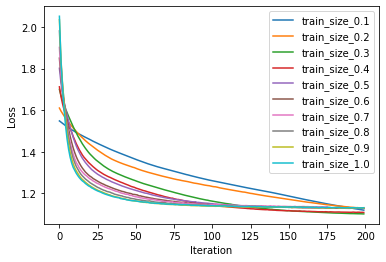

In [32]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# create an empty df for output
nn_lc_perf_out = pd.DataFrame()
for r in [0.1, 0.2,0.3, 0.4, 0.5,0.6, 0.7,0.8,0.9,1.0]:
    # frac train set to build model
#     print(len(X_train))
    X_trainf = X_train.sample(frac = r, random_state=0)
    y_trainf = y_train.loc[X_trainf.index]
    
#     print(len(X_trainf), len(y_trainf))
    # feature engineering
    X_trainf, X_valid, X_test = ohe(X_trainf, X_valid, X_test)
    # model
    params = {'hidden_layer_sizes': hls,
          'activation': act}
    mlp =  MLPClassifier(random_state = 0, hidden_layer_sizes=hls, activation=act)
    mlp.fit(X_trainf, y_trainf)
    # plot loss curve
    plt.plot(mlp.loss_curve_, label = "train_size_"+str(r))
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    
    lc_perf = model2(mlp, X_trainf, y_trainf, X_valid, y_valid)
    # add columns
    lc_perf['train_ratio'] = str(r)
    lc_perf['layer'] = hls
    lc_perf['activation'] = act
    lc_perf['name'] = 'nn_train_size'
    nn_lc_perf_out = nn_lc_perf_out.append(lc_perf)
    
nn_lc_perf_out

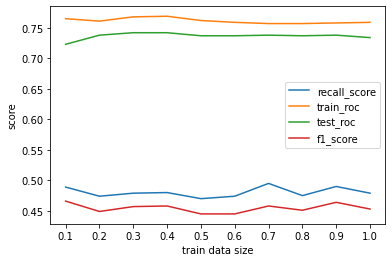

In [33]:
learning_curve_graph(nn_lc_perf_out)

In [34]:
# Neural network 2 test set output

In [35]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split2(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# model
mlp =  MLPClassifier(random_state = 0, hidden_layer_sizes=hls, activation=act)
mlp.fit(X_train, y_train)
nn_test_perf = model2(mlp, X_train, y_train, X_test, y_test)
nn_test_perf['layer'] = hls
nn_test_perf['activation'] = act
nn_test_perf['name'] = 'nn_test'
nn_test_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,layer,activation,name
0,0.488,0.49,0.758,0.749,0.488,0.461,0.469,3,relu,nn_test


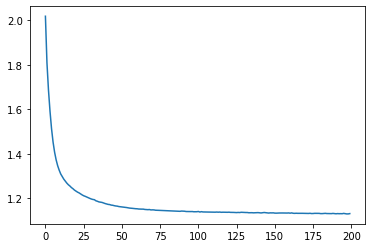

In [36]:
plt.plot(mlp.loss_curve_)
# max iteration default 200, the graph shows the model reach the best result at around 25th iteration 

In [37]:
nn_performance = pd.DataFrame()
nn_performance=nn_performance.append([nn_fe,nn_tune_perf,nn_gs_perf,nn_lc_perf_out,nn_test_perf]).reset_index()
nn_performance

,index,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name,layer,activation,train_ratio
0,0,0.474,0.482,0.832,0.739,0.474,0.459,0.828,nn_Feature_engineering,NaN,NaN,NaN
1,0,0.284,0.284,0.499,0.492,0.284,0.127,0.156,nn_tune,"(1,)",relu,NaN
2,0,0.472,0.481,0.751,0.744,0.472,0.427,0.234,nn_tune,"(1,)",identity,NaN
3,0,0.284,0.286,0.500,0.479,0.284,0.133,0.078,nn_tune,"(1,)",tanh,NaN
4,0,0.491,0.490,0.758,0.736,0.491,0.461,0.469,nn_tune,"(3,)",relu,NaN
5,0,0.471,0.481,0.756,0.736,0.471,0.447,0.250,nn_tune,"(3,)",identity,NaN
6,0,0.492,0.501,0.768,0.749,0.492,0.464,0.344,nn_tune,"(3,)",tanh,NaN
7,0,0.286,0.286,0.500,0.500,0.286,0.127,0.234,nn_tune,"(1, 1, 1)",relu,NaN
8,0,0.474,0.479,0.751,0.744,0.474,0.425,0.359,nn_tune,"(1, 1, 1)",identity,NaN
9,0,0.470,0.453,0.745,0.736,0.470,0.389,0.641,nn_tune,"(1, 1, 1)",tanh,NaN


In [38]:
nn_performance.to_excel('./performance/nn_perf_data2.xlsx',index=False)